# Pure noise SFRC

In [1]:
import time
from collections import namedtuple

try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np

import scipy.ndimage

try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io

try:
    import information_theory as IT
except:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
    import information_theory as IT

import utils        #freq, c_avg = fsc.get_SFRC_curve(denoised)
        #first_half = c_avg[:len(c_avg)>>1]
        #SFRC_curve.append(first_half)
        #plt.imshow(denoised, cmap="gray")
        #plt.show()
        #input()

from scipy.ndimage import gaussian_filter1d

In [2]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

In [3]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)

In [4]:
try:
    from self_fourier_shell_correlation import fsc_utils as fsc
except:
    !pip install "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"
    from self_fourier_shell_correlation import fsc_utils as fsc

128


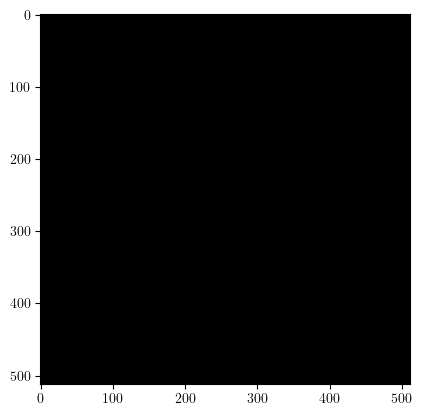

In [5]:
rows = 512
cols = 512
avg = 128
X = np.full((rows, cols), avg)
utils.imshow(X)
print(X[256,256])

In [6]:
Args = namedtuple("args", ["X", "Y"])
args = Args("http://www.hpca.ual.es/~vruiz/images/barb.png", "barb_0MMPG.png")
#X = skimage_io.imread(args.X)

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)


/home/vruiz/repos/denoising/notebooks/self_fourier_shell_correlation/fsc_utils.py:198: RuntimeWarning: invalid value encountered in divide
  corr = t / np.sqrt(b1 * b2)


compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlati

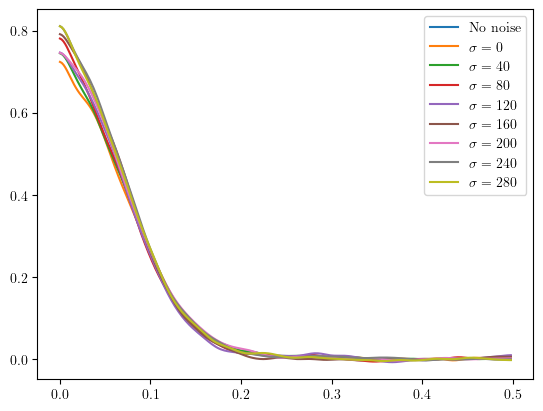

<Figure size 640x480 with 0 Axes>

In [7]:
#poisson_ratio = 1.0
poisson_ratio = 0.5
gamma = 0.15
#std_dev = 0

freq_2, c_avg_Y_2 = fsc.get_SFRC_curve__SPRS(X, std_dev=1)
filtered_c_avg_Y_2 = gaussian_filter1d(c_avg_Y_2, sigma=5)
plt.plot(freq_2, filtered_c_avg_Y_2, label="No noise")

for std_dev in range(0, 300, 40):
#for gamma in range(10, 100, 10):
    Y = utils.generate_MPGN(X, std_dev, gamma/1000, poisson_ratio)
    #freq_1, c_avg_Y_1 = fsc.get_SFRC_curve__even_odd(Y)
    freq_2, c_avg_Y_2 = fsc.get_SFRC_curve__SPRS(Y, std_dev=3)
    #plt.plot(freq_1, c_avg_Y_1, label="OE")
    #filtered_c_avg_Y_1 = gaussian_filter1d(c_avg_Y_1, sigma=5)
    #plt.plot(freq_1, filtered_c_avg_Y_1)

    #plt.plot(freq_2, c_avg_Y_2, label="RS")
    filtered_c_avg_Y_2 = gaussian_filter1d(c_avg_Y_2, sigma=5)
    plt.plot(freq_2, filtered_c_avg_Y_2, label=rf"$\sigma={std_dev}$")

plt.legend()
plt.show()
plt.savefig("pure_noise_SFRC_SPRS.pdf", bbox_inches='tight')

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlati

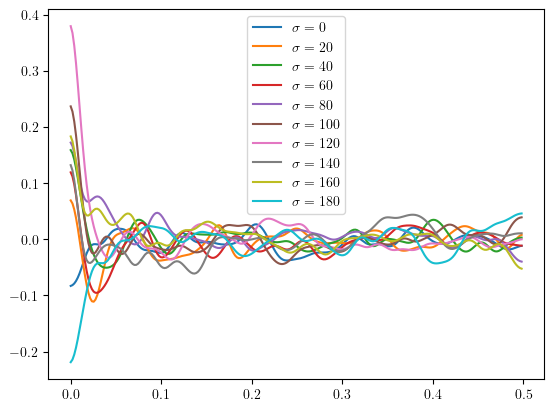

<Figure size 640x480 with 0 Axes>

In [8]:
poisson_ratio = 0.5
gamma = 0.15
for std_dev in range(0, 200, 20):
    Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio)
    freq_1, c_avg_Y_1 = fsc.get_SFRC_curve__even_odd(Y)
    #freq_2, c_avg_Y_2 = fsc.get_SFRC_curve__random_shuffling(Y, std_dev=5)
    #plt.plot(freq_1, c_avg_Y_1, label="OE")
    filtered_c_avg_Y_1 = gaussian_filter1d(c_avg_Y_1, sigma=5)
    plt.plot(freq_1, filtered_c_avg_Y_1, label=rf"$\sigma={std_dev}$")

    #plt.plot(freq_2, c_avg_Y_2, label="RS")
    #filtered_c_avg_Y_2 = gaussian_filter1d(c_avg_Y_2, sigma=5)
    #plt.plot(freq_2, filtered_c_avg_Y_2)

plt.legend()
plt.show()
plt.savefig("pure_noise_SFRC_EO.pdf", bbox_inches='tight')

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)


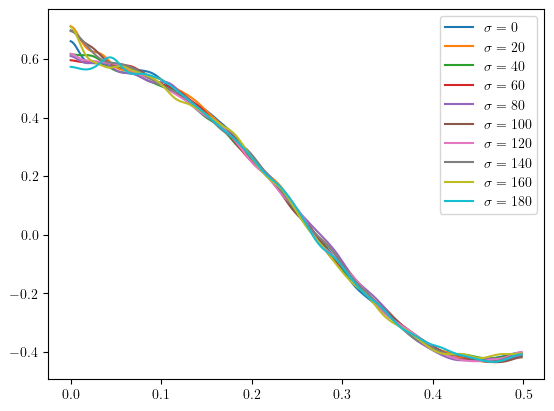

<Figure size 640x480 with 0 Axes>

In [9]:
poisson_ratio = 0.5
gamma = 0.15
for std_dev in range(0, 200, 20):
    Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio)
    freq_1, c_avg_Y_1 = fsc.get_SFRC_curve__chessboard(Y)
    #freq_2, c_avg_Y_2 = fsc.get_SFRC_curve__random_shuffling(Y, std_dev=5)
    #plt.plot(freq_1, c_avg_Y_1, label="OE")
    filtered_c_avg_Y_1 = gaussian_filter1d(c_avg_Y_1, sigma=5)
    plt.plot(freq_1, filtered_c_avg_Y_1, label=rf"$\sigma={std_dev}$")

    #plt.plot(freq_2, c_avg_Y_2, label="RS")
    #filtered_c_avg_Y_2 = gaussian_filter1d(c_avg_Y_2, sigma=5)
    #plt.plot(freq_2, filtered_c_avg_Y_2)
#print(freq_1)
#plt.ylim(-5, 5)
plt.legend()
plt.show()
plt.savefig("pure_noise_SFRC_EO.pdf", bbox_inches='tight')

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)


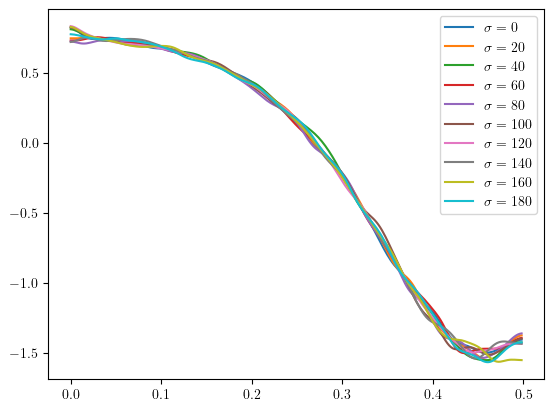

<Figure size 640x480 with 0 Axes>

In [10]:
poisson_ratio = 0.5
gamma = 0.15
for std_dev in range(0, 200, 20):
    Y = utils.generate_MPGN(X, std_dev, gamma, poisson_ratio)
    freq_1, c_avg_Y_1 = fsc.get_SFRC_curve__chessboard(Y)
    #freq_2, c_avg_Y_2 = fsc.get_SFRC_curve__random_shuffling(Y, std_dev=5)
    #plt.plot(freq_1, c_avg_Y_1, label="OE")
    filtered_c_avg_Y_1 = gaussian_filter1d(c_avg_Y_1, sigma=5)
    plt.plot(freq_1, filtered_c_avg_Y_1, label=rf"$\sigma={std_dev}$")

    #plt.plot(freq_2, c_avg_Y_2, label="RS")
    #filtered_c_avg_Y_2 = gaussian_filter1d(c_avg_Y_2, sigma=5)
    #plt.plot(freq_2, filtered_c_avg_Y_2)
#print(freq_1)
#plt.ylim(-5, 5)
plt.legend()
plt.show()
plt.savefig("pure_noise_SFRC_EO.pdf", bbox_inches='tight')